<h1>Lesson 1. kNN on Iris dataset</h1>

<table>
  <tr>
    <td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/180px-Kosaciec_szczecinkowaty_Iris_setosa.jpg" style="width:250px; height:200px;"></td>
    <td><img src="https://www.math.umd.edu/~petersd/666/html/iris_with_labels.jpg" width="250px"></td>
    <td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/295px-Iris_virginica.jpg" width="250px"></td>
  </tr>
</table>
  
  <p>This exercise relates to the <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set">iris data set</a>,
which contains the morphologic variation of Iris flowers of three related species (Iris setosa, Iris virginica and Iris versicolor).</p>
<p>Four features were measured from each observation (see image above):</p>
<ul>
<li>Sepal.Length - sepal length in centimeters</li>
<li>Sepal.Width - sepal width in centimeters</li>
<li>Petal.Length - petal length in centimeters</li>
<li>Petal.Width - petal width in centimeters</li>
<li>Species - species of the flower (our outcome variable)</li>
</ul>
<p>scikit-learn comes with a few small standard datasets that do not require to download any file from some external website.</p>
<p>You can check the documentation <a href="http://scikit-learn.org/stable/datasets/index.html">here</a></p>
<p>This dataset is built in under variable 'iris'. Let's see how it looks:</p>

In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
species_names = list(iris.target_names)
print(species_names)
# print the integers representing the species of each observation
print (iris.target)

data = pd.DataFrame(iris.data)
data.columns = iris.feature_names
data['label'] = iris.target
data.head()
print(data.index)
print(data.columns)

['setosa', 'versicolor', 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
RangeIndex(start=0, stop=150, step=1)
Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'label'],
      dtype='object')


<h3>Q.1. How many observations are present for each species?</h3>

In [3]:
# Put the command (or commands) here that would give an answer to the above question.
#TODO
from collections import Counter
obs = dict(Counter(iris.target))
# data.loc[data['label']==i,'petal length (cm)']

print('there is {} samples by specie'.format(list(set(obs.values()))[0]))
print(type(data))

there is 50 samples by specie
<class 'pandas.core.frame.DataFrame'>


<h3>Q.2. Plot the Sepal.Width vs. Sepal.Length, Petal.Width vs. Petal.Length, while color-coding the species.</h3> 

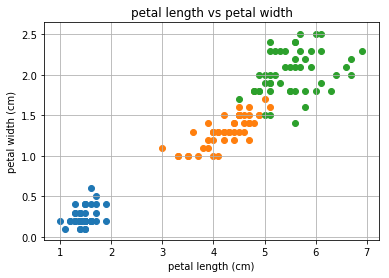

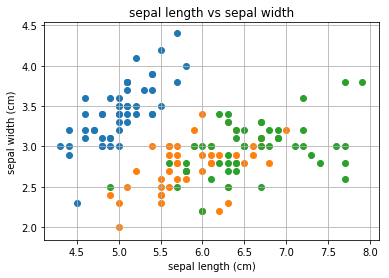

In [9]:
# Write the two plot commands here
#TODO
# create a scatter plot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES
# create a custom colormap
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
labels = list(iris.target_names)

plt.title('petal length vs petal width')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
#plt.legend(loc='upper left')
plt.grid(True)

# plt.plot(kind='scatter', x=data['petal length (cm)'], y=data['petal width (cm)'])

nb_species = len(obs)
# Add label and color
for i in range(nb_species):
    x_data = data.loc[data['label']==i,'petal length (cm)'].tolist()
    y_data = data.loc[data['label']==i,'petal width (cm)'].tolist()
    plt.scatter(x_data, y_data,label=labels[i],cmap=cmap_bold)

plt.show()

# create a scatter plot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES

plt.title('sepal length vs sepal width')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
#plt.legend(loc='upper left')
plt.grid(True)
# plt.plot(kind='scatter', x=data['sepal length (cm)'], y=data['sepal width (cm)'])

for i in range(nb_species):
    x_data = data.loc[data['label']==i,'sepal length (cm)'].tolist()
    y_data = data.loc[data['label']==i,'sepal width (cm)'].tolist()
    plt.scatter(x_data, y_data,label=labels[i])

plt.show()



<h3>Q.3. Which of the plots allows for easier determination of the flower type?</h3>

In [4]:
# Identify the plot that clearly separates the classes
print('PETAL LENGTH versus PETAL WIDTH')

PETAL LENGTH versus PETAL WIDTH


<br>
<p>After the initial exploratory data analysis.</p>

<h3>Q.4. Write the command to split the data into 70% train and 30% test, to prepare for k-NN modelling:</h3>

In [5]:
from sklearn.model_selection import train_test_split

# first split the dataset into its attributes and labels
X = data.iloc[:, :-1].values  
y = data.iloc[:, 4].values  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)



<h3>Q.5. Write the Python command that performs k-NN fit using Petal.Width and Petal.Length only using 2 neighbors.</h3>

In [6]:
from sklearn.neighbors import KNeighborsClassifier as Kneig

# Instantiate learning model (k = 3)
clf = Kneig(n_neighbors=3)

# Fitting the model
fitting = clf.fit(X_train, y_train)
print(fitting.score(X_test, y_test))

# Predicting the Test set results
y_pred = clf.predict(X_test)

delta = sum(map(lambda x,y: bool(x-y),y_pred,y_test))
print('the prediction model has made {} errors'.format(delta) )


0.9777777777777777
the prediction model has made 1 errors


<h3>Q.6. Evaluate your algorithm using the confusion_matrix and classification_report methods of the sklearn.metrics</h3>

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred,target_names=species_names))
acc = accuracy_score(y_test, y_pred, normalize=True)
print(acc)

[[11  0  0]
 [ 0 16  0]
 [ 0  1 17]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.94      1.00      0.97        16
   virginica       1.00      0.94      0.97        18

   micro avg       0.98      0.98      0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

0.9777777777777777


<h3>Q.7. What accuracy did you obtain?</h3>

In [8]:
print('the obtained accuracy is {}'.format(round(acc,3)))

the obtained accuracy is 0.978


<h3>Q.8. Try with different values of k (3 and 5), do you observe any difference in your result? Explain.</h3>

In [9]:
from sklearn.neighbors import KNeighborsClassifier as Kneig

# Instantiate learning model (k = 5)
clf = Kneig(n_neighbors=5)

# Fitting the model
clf.fit(X_train, y_train)

# Predicting the Test set results
y_pred = clf.predict(X_test)

delta = sum(map(lambda x,y: bool(x-y),y_pred,y_test))
print('the prediction model has made {} errors'.format(delta) )

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred,target_names=species_names))
print(accuracy_score(y_test, y_pred, normalize=True))

print('Between 3 and 5 the accuracy does not change much, the precision depends on how the test set is being sample')

the prediction model has made 2 errors
[[11  0  0]
 [ 0 15  1]
 [ 0  1 17]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.94      0.94      0.94        16
   virginica       0.94      0.94      0.94        18

   micro avg       0.96      0.96      0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

0.9555555555555556
Between 3 and 5 the accuracy does not change much, the precision depends on how the test set is being sample


<h3>Q.9. List three methods that can be used to improve prediction quality</h3>

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# 1. Choosing the most applicable set of variables
print('Having distinctive clusters of data using Dunn Index and silhouette score')


# Silhouette score  'sepal length vs sepal width'
b = np.delete(data.values,[2,3,4],1)
c = np.delete(data.values,[0,1,2,3],1).flatten() #transforming vector into array
silh = metrics.silhouette_score(b,c)
print('sepal length vs sepal width silhouette score {}'.format(round(silh,2)))

# Silhouette score for 'petal length vs petal width'
b = np.delete(data.values,[0,1,4],1)
silh = metrics.silhouette_score(b,c)
print('petal length vs petal width silhouette score {}'.format(round(silh,2)))

print('the score indicates that petal length vs petal width is the best set')

# 2. Choosing an optimal value for k for kNN
print('\ngenerally sqrt(n) is a good value for k')
for i in range(1,8):
    print('\n{}'.format(i))
    clf = Kneig(n_neighbors=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test, y_pred, normalize=True))
    print('Perform Cross-validation')
    scores = cross_val_score(clf, iris.data, iris.target, cv=10)
    # print(scores)
    print('Accuracy {} (+/- {})'.format(round(scores.mean(),2), round(scores.std() * 2),3))
    

# 3. Not overfitting the data in general
scores = cross_val_score(clf, iris.data, iris.target, scoring="neg_mean_squared_error",cv=10)
print('\nMinmize MSE') 
print(-scores.mean())

Having distinctive clusters of data using Dunn Index and silhouette score
sepal length vs sepal width silhouette score 0.25
petal length vs petal width silhouette score 0.64
the score indicates that petal length vs petal width is the best set

generally sqrt(n) is a good value for k

1
0.9777777777777777
Perform Cross-validation
Accuracy 0.96 (+/- 0.0)

2
0.9555555555555556
Perform Cross-validation
Accuracy 0.95 (+/- 0.0)

3
0.9777777777777777
Perform Cross-validation
Accuracy 0.97 (+/- 0.0)

4
0.9777777777777777
Perform Cross-validation
Accuracy 0.97 (+/- 0.0)

5
0.9555555555555556
Perform Cross-validation
Accuracy 0.97 (+/- 0.0)

6
0.9777777777777777
Perform Cross-validation
Accuracy 0.97 (+/- 0.0)

7
0.9555555555555556
Perform Cross-validation
Accuracy 0.97 (+/- 0.0)

Minmize MSE
0.03333333333333333


In [12]:
a = 2
b = 2
c = a + b
print(c)

4
